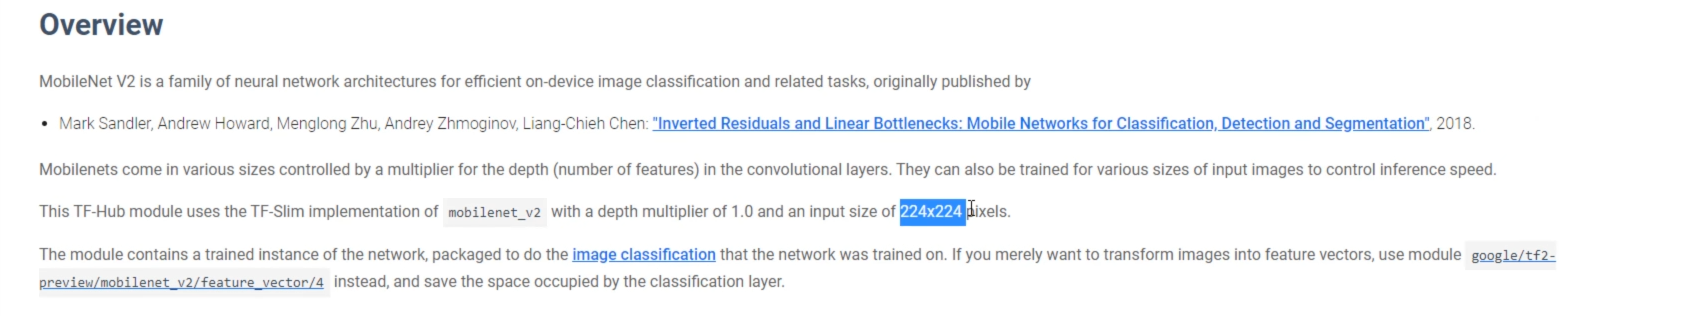

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os 
import PIL.Image as Image
import cv2

In [48]:
IMAGE_SHAPE=(224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=IMAGE_SHAPE+(3,))
])

SINCE THE IMAGE SIZE IS 224*224 AND WE ADDING ANOTHER CHANNEL AS 3 TO IT LIKE RGB

In [49]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

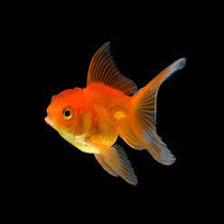

In [50]:
gold_fish = Image.open('E:\T-Machine\download.jpg').resize(IMAGE_SHAPE)
gold_fish

In [51]:
gold_fish = np.array(gold_fish)/255.0
gold_fish

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0

In [52]:
gold_fish.shape

(224, 224, 3)

NOW WE ARE GOING TO ADD ONE MORE DIMENSION BEACAUSE IN PREDICTION WE WILL NOT PREDICT JUST ONE IMAGE WE NEED TO PREDICT MORE THAN ONE IMAGE

In [53]:
gold_fish[np.newaxis,...].shape

(1, 224, 224, 3)

In [54]:
result = classifier.predict(gold_fish[np.newaxis,...])
result

1/1 [==============================] - 0s 312ms/step


array([[ 0.29136243,  2.5868247 , 10.375095  , ..., -2.157635  ,
        -0.4396726 , -0.63625157]], dtype=float32)

In [55]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [56]:
image_labels = []
with open("E:\T-Machine\ImageNetLabels.txt") as f:
    image_labels=f.read().split()
image_labels[0:10]    


['background',
 'tench',
 'goldfish',
 'great',
 'white',
 'shark',
 'tiger',
 'shark',
 'hammerhead',
 'electric']

In [57]:
image_labels[predicted_label_index]

'goldfish'

In [58]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [59]:
data_dir

'.\\datasets\\flower_photos'

In [60]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [61]:
list(data_dir.glob("*/*.jpg"))[0:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [62]:
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [63]:
roses = list(data_dir.glob("roses/*"))
roses[0:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

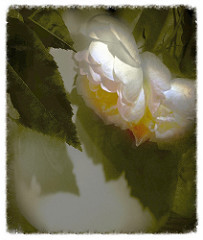

In [64]:
Image.open(str(roses[67]))

In [65]:
flowers_images_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflower/*')),
    'tulips':list(data_dir.glob('tulips/*')),

}

In [66]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,

}

In [67]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [68]:
img.shape

(240, 179, 3)

In [69]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [70]:
X,y = [] , []
for flower_name , images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_image = cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_image)
        y.append(flowers_labels_dict[flower_name])

In [71]:
X=np.array(X)
y=np.array(y)

In [72]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=0)

In [73]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

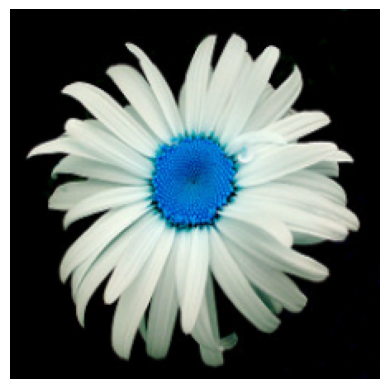

In [74]:
plt.axis('off')
plt.imshow(X[789])

In [75]:
predicted = classifier.predict(np.array([X[0],X[1],X[2]]))
predicted = np.argmax(predicted,axis=1)
predicted


1/1 [==============================] - 0s 354ms/step


array([795, 880, 795], dtype=int64)

In [76]:
image_labels[795]

'dial'

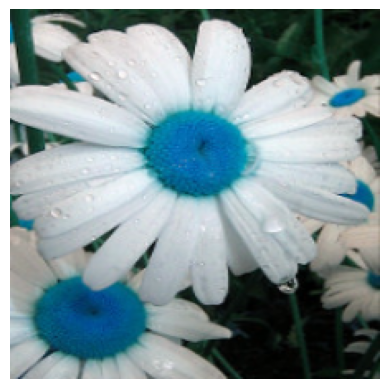

In [77]:
plt.axis('off')
plt.imshow(X[795])

THIS PRETRAINED MODEL IS NOT PREDICTING GOOD SO WE NEED TO TERAIN THIS MODEL

In [78]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model,input_shape = (224,224,3) , trainable =False
)     # trainable False means we are freezing the pretrained model 

In [79]:
num_of_flowers = 5 
model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    layers.Dense(num_of_flowers)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [81]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)
model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
70/70 [==============================] - 21s 281ms/step - loss: 0.0320 - accuracy: 0.9991
Epoch 2/5
70/70 [==============================] - 19s 276ms/step - loss: 0.0262 - accuracy: 0.9991
Epoch 3/5
70/70 [==============================] - 19s 266ms/step - loss: 0.0232 - accuracy: 1.0000
Epoch 4/5
70/70 [==============================] - 19s 268ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 5/5
70/70 [==============================] - 19s 267ms/step - loss: 0.0180 - accuracy: 1.0000


In [82]:
model.evaluate(X_test_scaled,y_test)

24/24 [==============================] - 7s 264ms/step - loss: 0.3870 - accuracy: 0.8816


[0.3870292603969574, 0.8815612196922302]